### Titulo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

### Paso 1: Definición del problema

Antes de comenzar a analizar el conjunto de datos, debemos definir el problema o desafío que estamos intentando resolver con esta información.

> El objetivo principal sería predecir el precio de alquiler (price) de un listado basándose en las otras características disponibles en el dataset.



### Paso  2: Recopilación de datos


Importamos los datos y creamos el DataFrame

In [2]:
df = pd.read_csv("../data/raw/internal-link.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Paso 3: Análisis Descriptivo

Una vez que hemos cargado el conjunto de datos, debemos analizarlo en su totalidad, sin distinción de train y test, para obtener conclusiones conjuntas. Una vez que tenemos la información cargada en una estructura de datos manejable como es un DataFrame de Pandas, podemos arrancar con el proceso.

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
# obtener las dimenciones
df.shape

(48895, 16)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Observaciones: El conjunto de datos contiene 48,895 registros de alojamientos y 16 características, siendo el Precio (Price) la variable principal a predecir. En cuanto a la calidad de los datos, las características last_review y reviews_per_month presentan un problema serio, ya que ambas tienen más del 20% de sus valores faltantes (más de 1,000 registros). La estructura general de las características se divide en 10 de tipo numérico y 6 de tipo categórico.

## Paso : Limpieza de Datos

Eliminar  duplicados 

Un punto muy importante a tener en cuenta en este paso es eliminar aquellas instancias que pudieran estar duplicadas en el conjunto de datos. Esto es crucial debido a que, de dejarlos, el mismo punto tendría varias representaciones, lo cual es matemáticamente incoherente e incorrecto. Para ello, hemos de ser inteligentes buscando duplicados y conocer previamente si los hay y dónde, antes de eliminarlos.

Además, tenemos que tener en cuenta que una instancia puede estar repetida independientemente del identificador que pueda tener, así que en este caso nos interesa eliminar del análisis la variable Id, ya que podría estar mal generada.

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [8]:
df.drop('id',axis=1).duplicated().sum()

np.int64(0)

Observaciones: 
En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de drop_duplicates().

In [9]:
df = df.drop_duplicates(subset=df.columns.difference(['id']))

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Cuando queremos preparar los datos para entrenar un modelo predictivo debemos responder a la siguiente pregunta:

¿Son todas las características imprescindibles para realizar una predicción?
Normalmente, esa pregunta es un rotundo no. Tenemos que ser objetivos y llevar a cabo este proceso previo antes de la fase de selección de características. Por lo tanto, aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que estamos seguros de que el algoritmo no va a utilizarlas en el proceso predictivo, 

Conclusión:
Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:
>"id","name","host_id","host_name","last_review","reviews_per_month","number_of_reviews"



In [10]:
df.drop(["id","name","host_id","host_name","last_review","reviews_per_month","number_of_reviews"], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0


Paso 5

#### 1. Variables Categóricas
El análisis se centrará en la frecuencia y proporción de cada categoría.

>neighbourhood_group: (Grupo de Vecindario),
>neighbourhood: (Vecindario),
>room_type: (Tipo de Habitación)

neighbourhood_group: Deberías ver una clara dominancia de 2 o 3 grupos principales (probablemente Manhattan y Brooklyn).

neighbourhood: Esta columna tiene una alta cardinalidad (muchos valores únicos). Identifica si existen vecindarios con muy pocos listados que puedan ser agrupados o ignorados.

room_type: Analiza la distribución de los tipos de alquileres (casa/apartamento completo, habitación privada, habitación compartida).

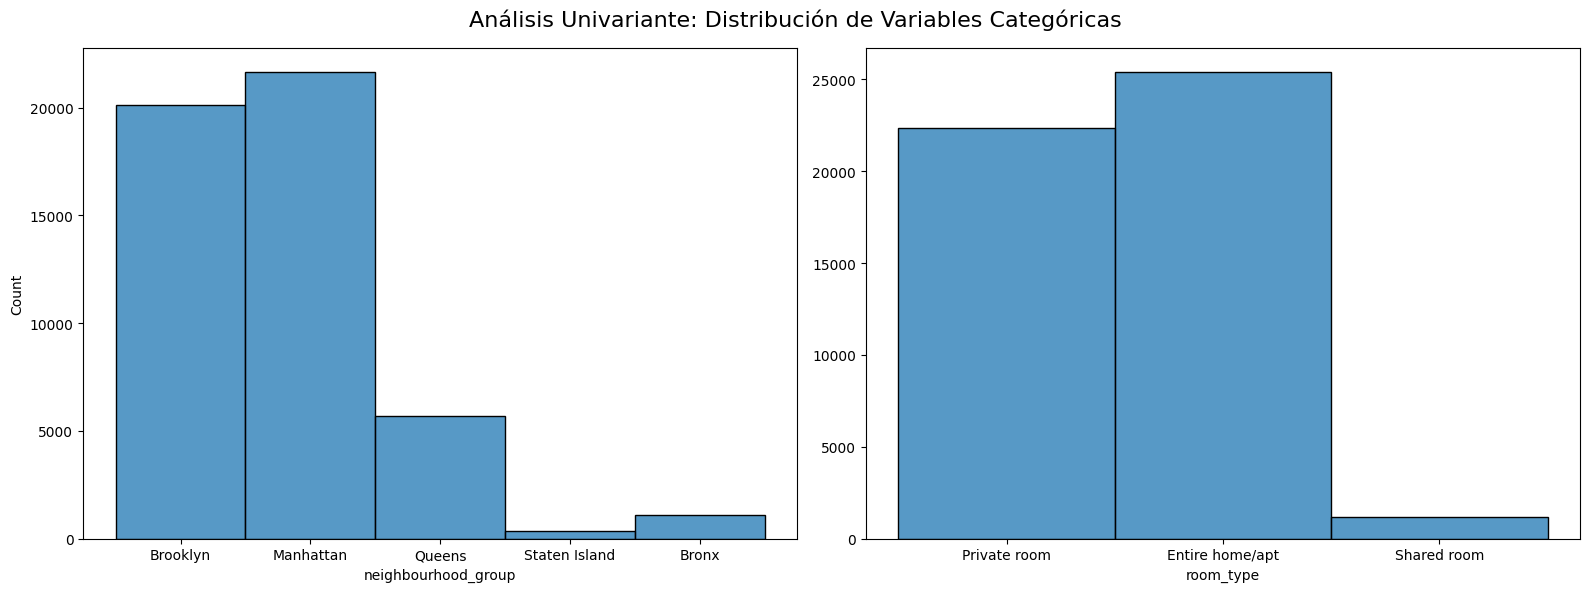

In [11]:
fig, axis = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Univariante: Distribución de Variables Categóricas', fontsize=16)

sns.histplot(ax=axis[0], data=df, x="neighbourhood_group")
sns.histplot(ax=axis[1], data=df, x="room_type").set(ylabel=None)


plt.tight_layout()
plt.show()

Los graficos muestran que la mayoría de las opciones disponibles se dividen casi por igual entre apartamentos completos (Entire home/apt) y habitaciones privadas (Private room). Ambos tipos son muy frecuentes, con más de 22,000 registros cada uno, y el alquiler de un apartamento o casa completa es el más común de todos, superando los 25,000 listados.

En contraste, las habitaciones compartidas (Shared room) son una opción muy minoritaria. El número de alquileres de este tipo es muy bajo, con menos de 5,000 registros en total. Esto significa que la gran mayoría de la oferta en este mercado se enfoca en proporcionar alojamiento completo o un espacio privado dentro de una propiedad. Por lo tanto, cualquier estudio futuro sobre precios o características se centrará casi por completo en los tipos de alojamiento más grandes, ya que tienen la mayor cantidad de datos.

#### 2. Variables Numéricas

El análisis se centrará en la distribución, la tendencia central, la dispersión y la presencia de valores atípicos (outliers).

> price (Variable Objetivo),

> latitude, longitude,

> minimum_nights,

> calculated_host_listings_count, availability_365

price (Precio): Distribución: Es casi seguro que estará sesgada positivamente (sesgada a la derecha), con muchos listados de bajo costo y una cola larga de precios muy altos.
Outliers: El Box Plot es fundamental para identificar los listados con precios extremadamente altos, que probablemente deberás eliminar o transformar (aplicar logaritmo) antes del modelado.

minimum_nights (Noches Mínimas): Outliers: Es probable que haya valores extremos (ej. minimum_nights = 365). Debes decidir si truncar o eliminar estos valores atípicos.

latitude / longitude: Si bien son numéricas, su significado es geográfico. El análisis univariante solo mostrará el rango de valores.

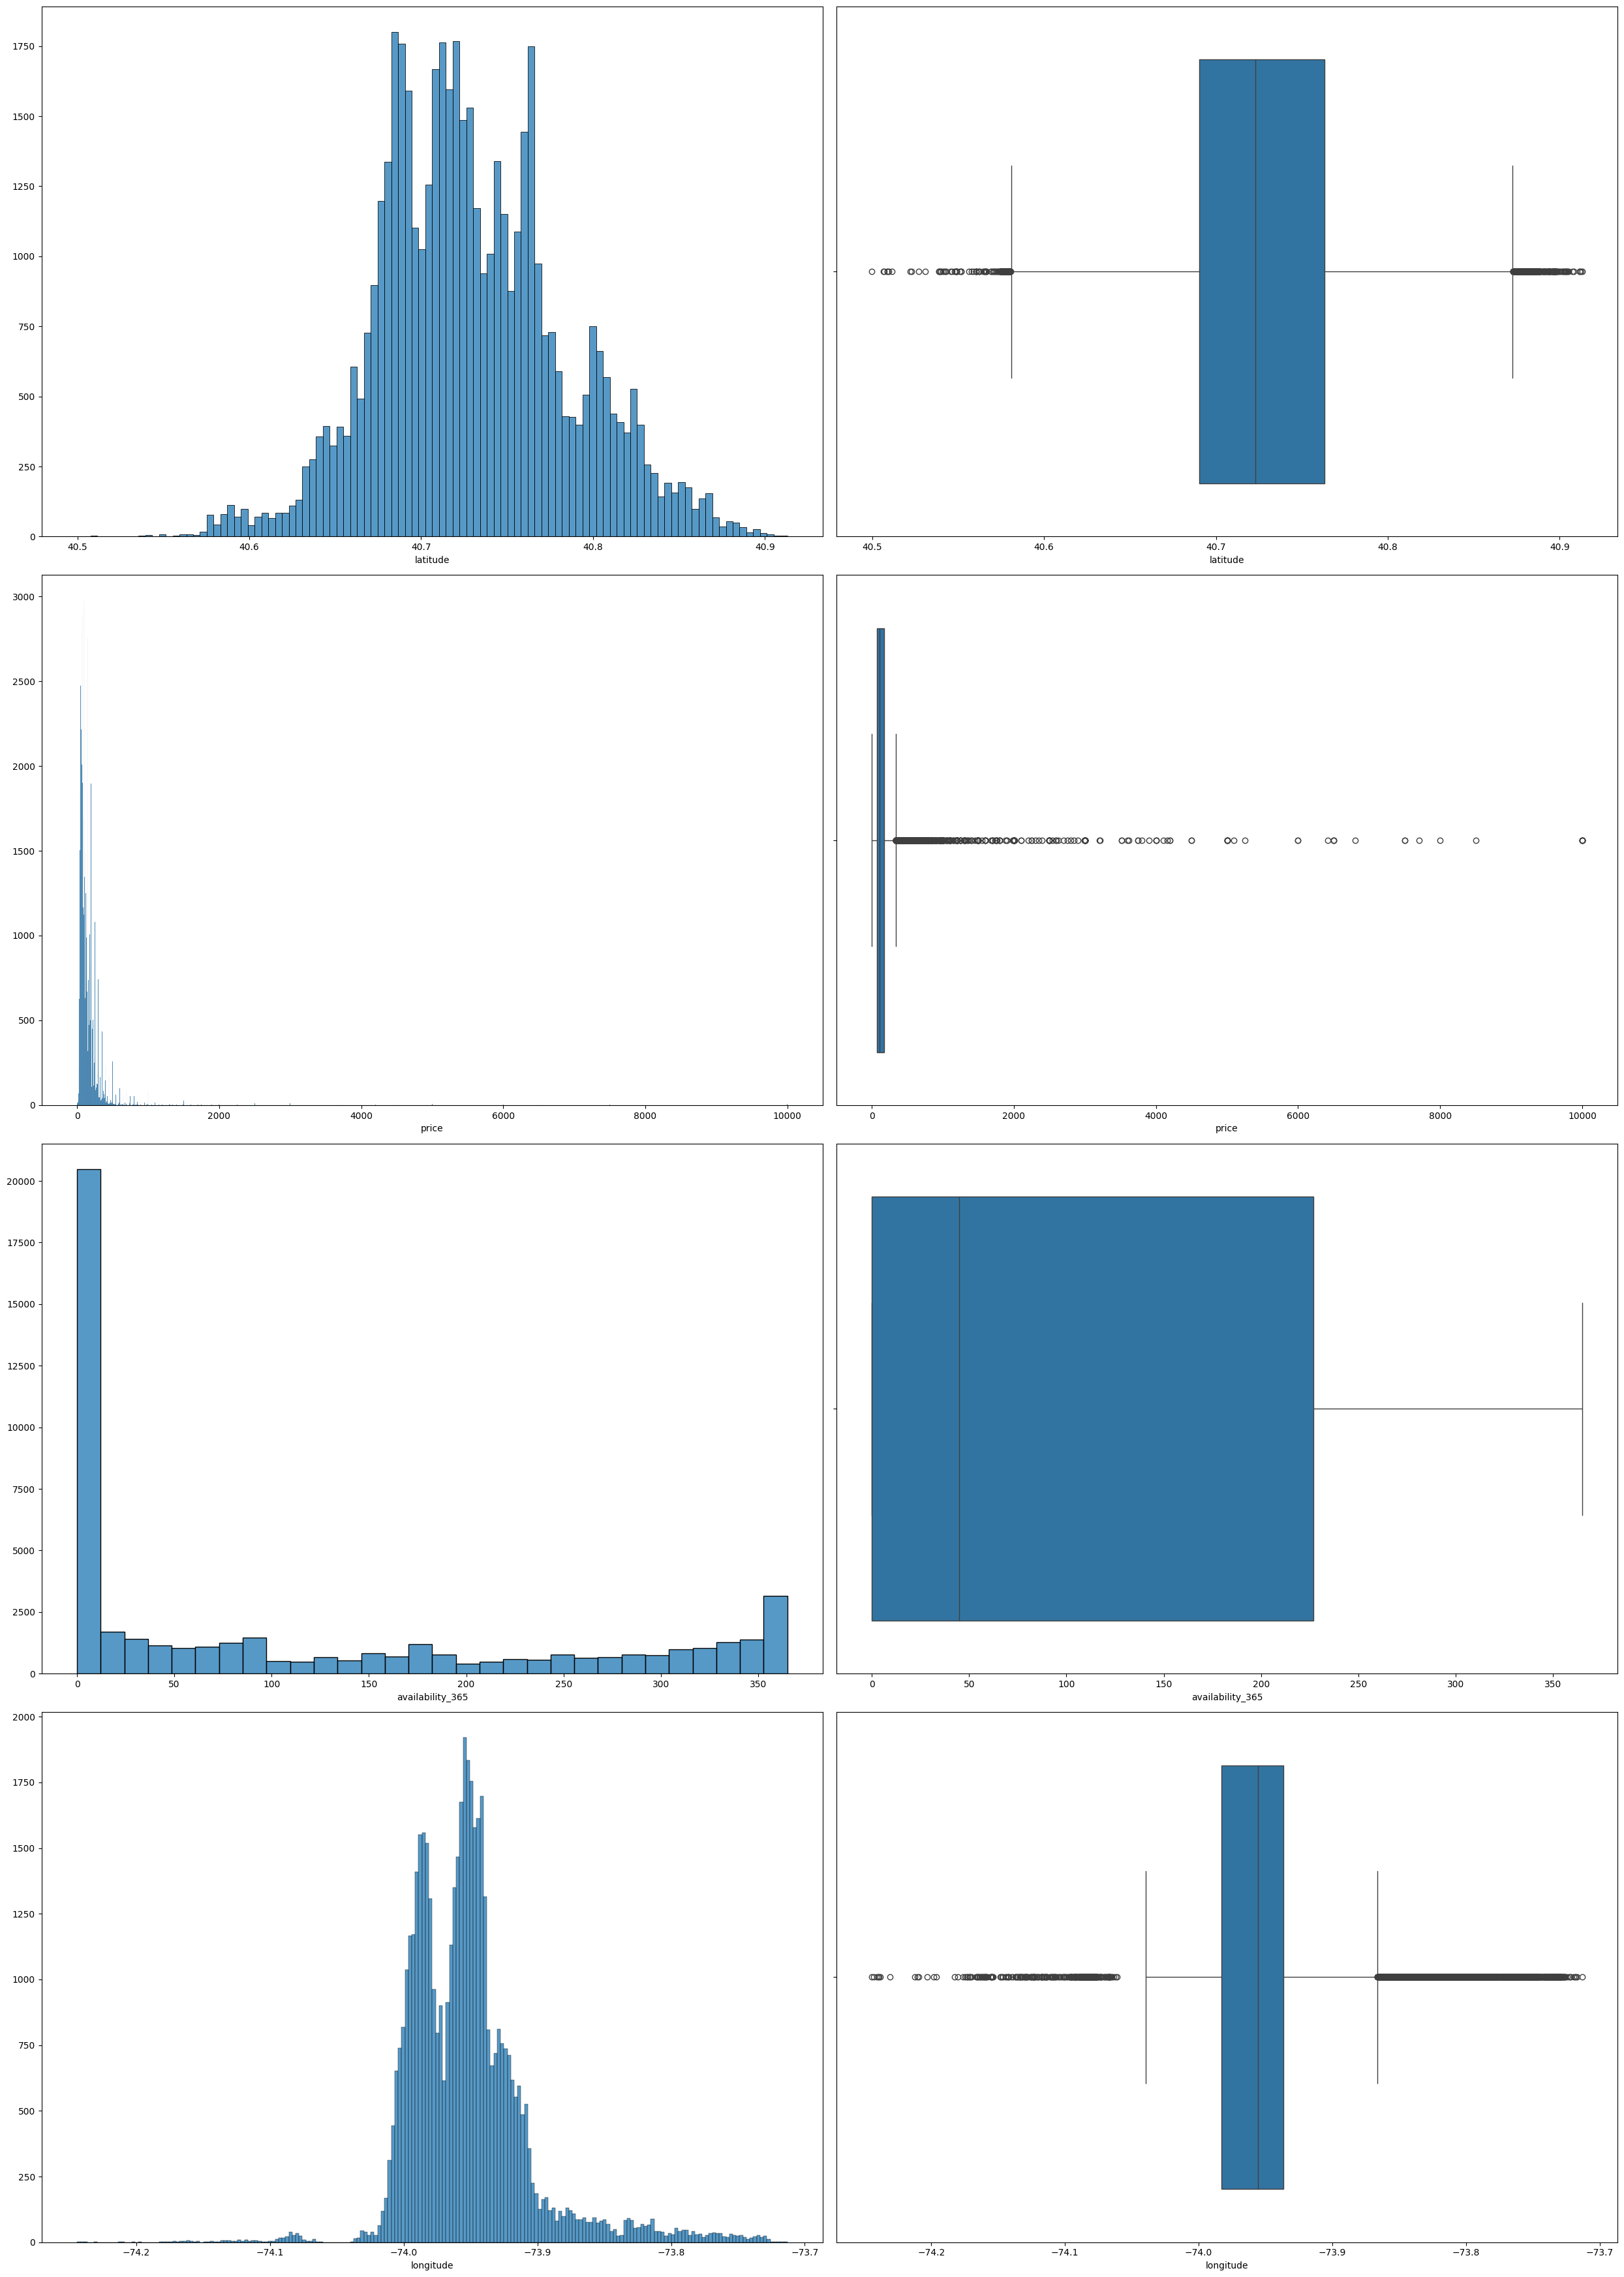

In [12]:
fig, axis = plt.subplots(4, 2, figsize=(25, 35))

sns.histplot(ax=axis[0, 0], data=df, x="latitude").set(ylabel=None)
sns.boxplot(ax=axis[0, 1], data=df, x="latitude")
sns.histplot(ax=axis[1, 0], data=df, x="price").set(ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="price")
sns.histplot(ax=axis[2, 0], data=df, x="availability_365").set(ylabel=None)
sns.boxplot(ax=axis[2, 1], data=df, x="availability_365")
sns.histplot(ax=axis[3, 0], data=df, x="longitude").set(ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="longitude")



plt.tight_layout()
plt.show()

analisis de variables univariante

In [13]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

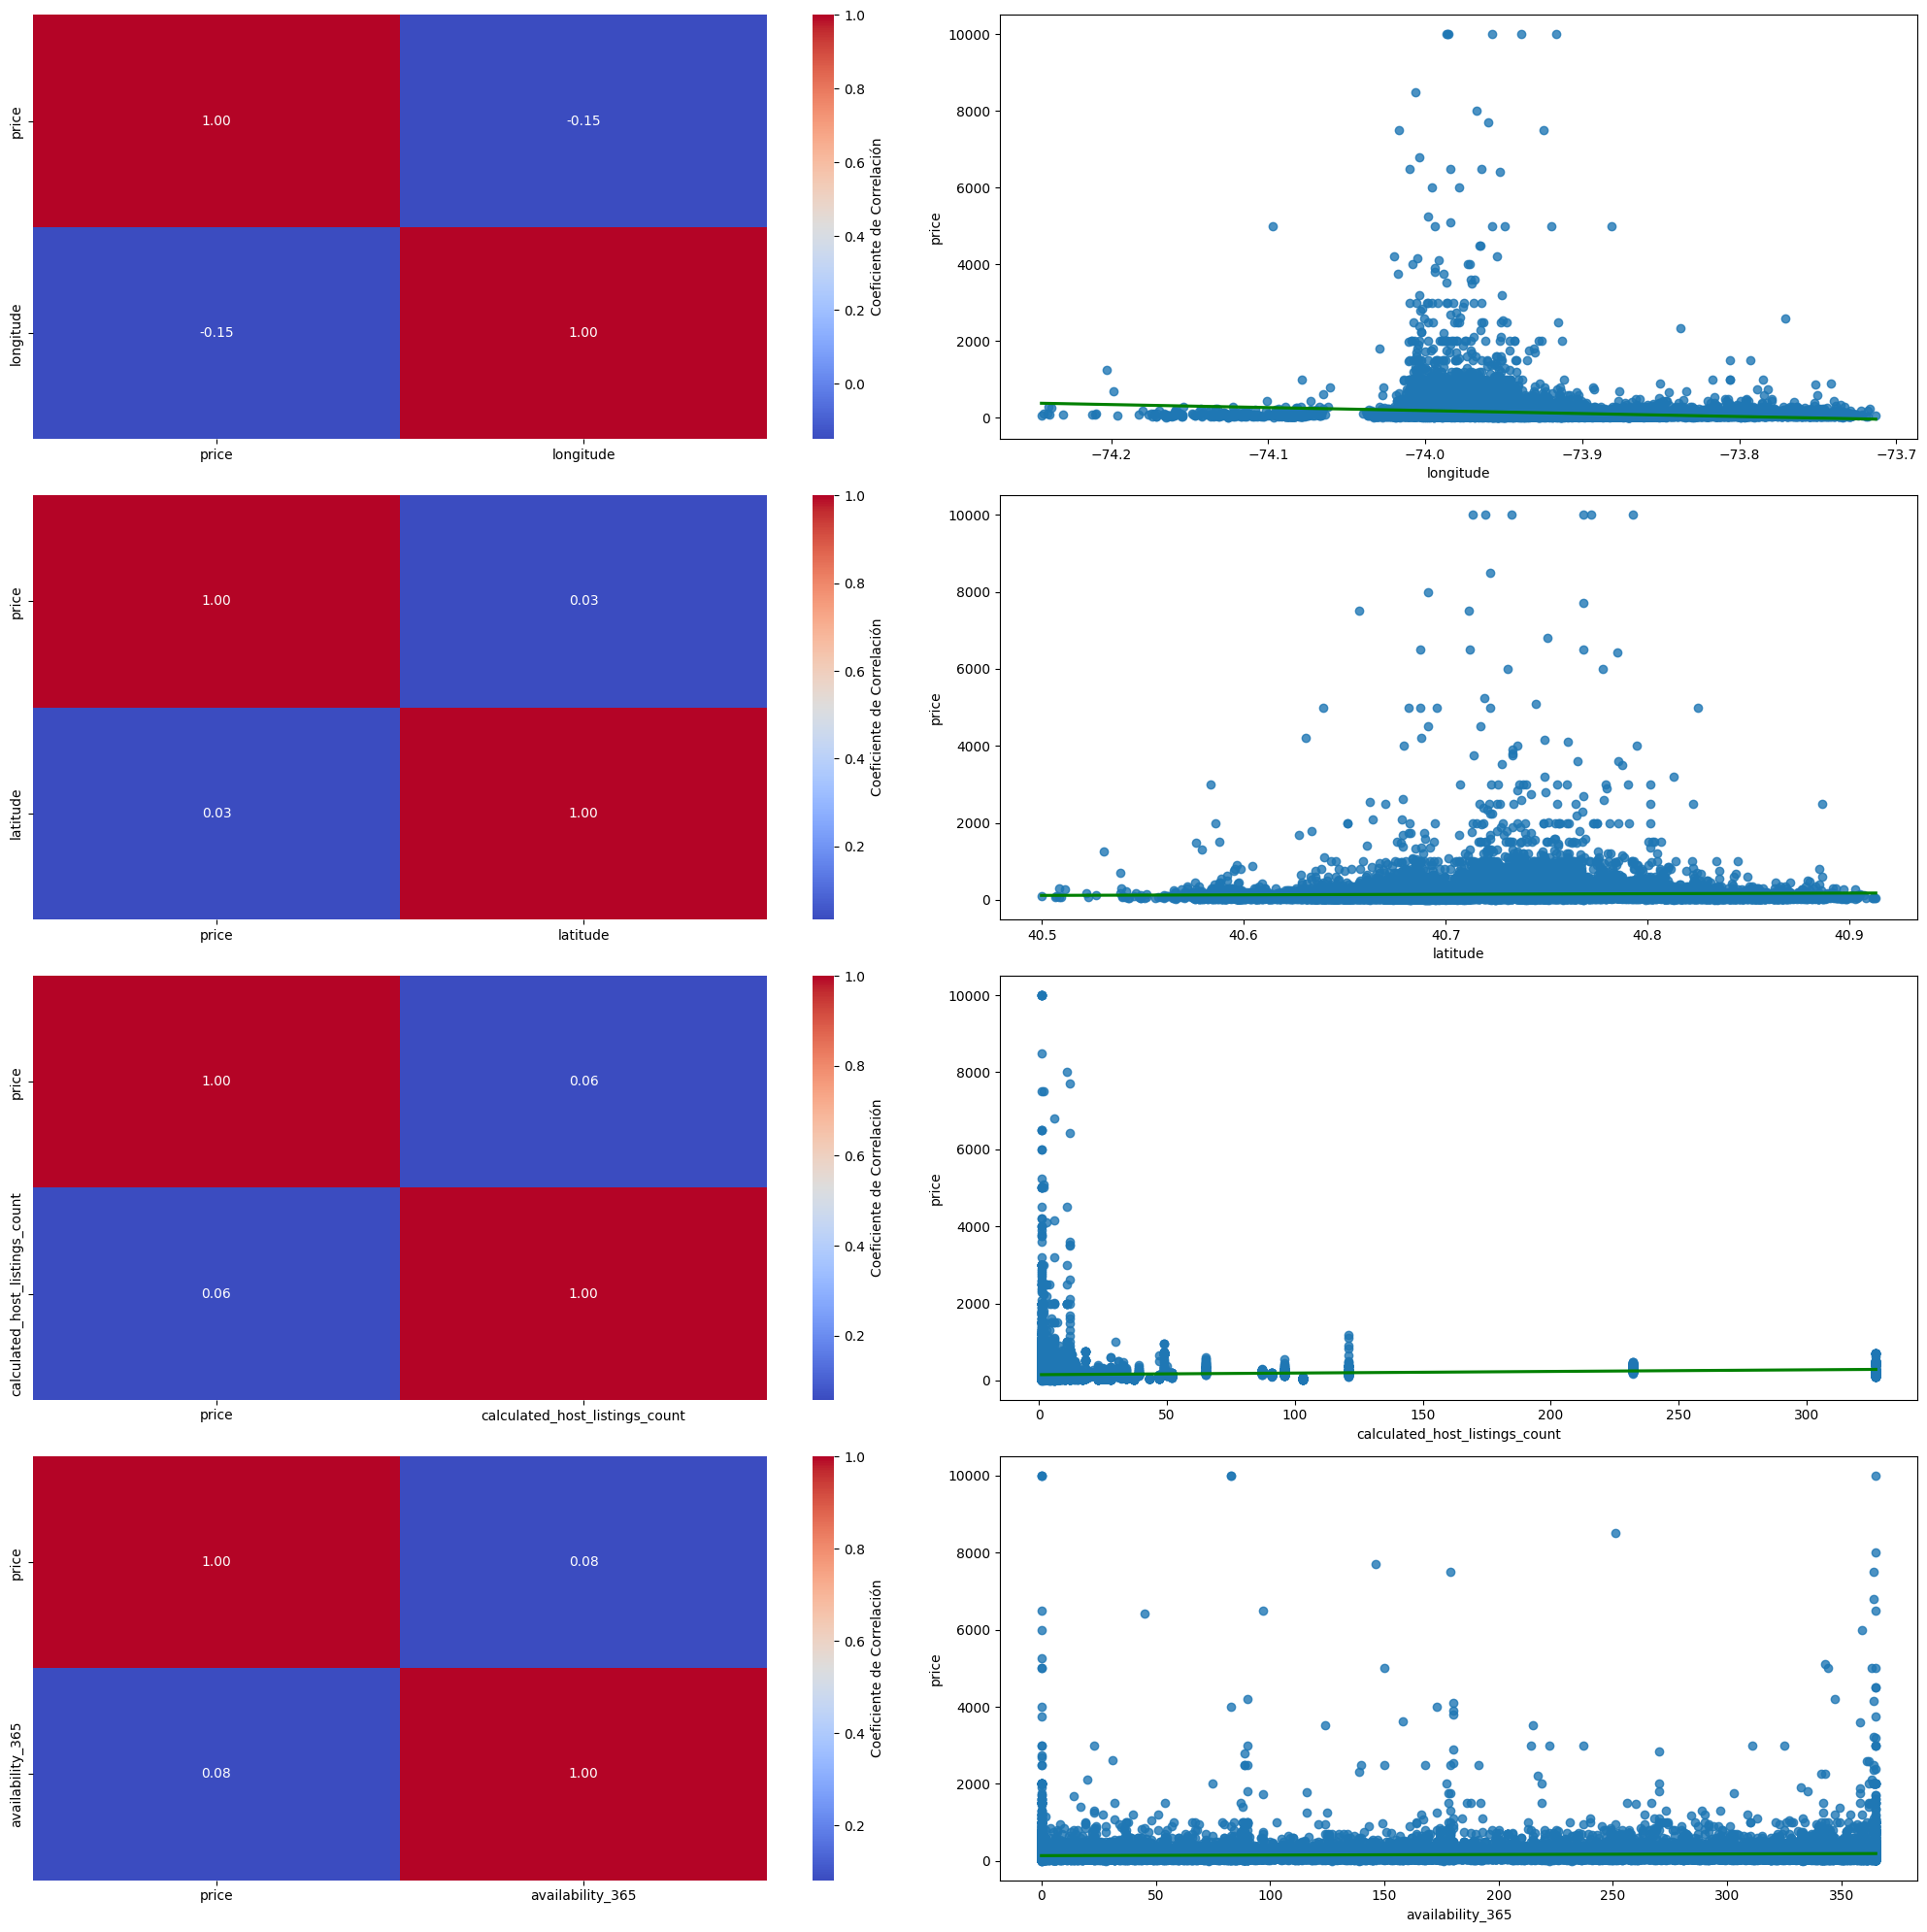

In [14]:

correlation_matrix = df[['price', 'longitude']].corr()
correlation_matrix2 = df[['price', 'latitude']].corr()
correlation_matrix3 = df[['price', 'calculated_host_listings_count']].corr()
correlation_matrix4 = df[['price', 'availability_365']].corr()

fig, axis = plt.subplots(4,2, figsize=(20,20))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Coeficiente de Correlación'},ax=axis[0,0])
sns.regplot(ax=axis[0,1], data=df, x='longitude', y='price', line_kws={'color':'green'})

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Coeficiente de Correlación'},ax=axis[1,0])
sns.regplot(ax=axis[1,1], data=df, x='latitude', y='price', line_kws={'color':'green'})

sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Coeficiente de Correlación'},ax=axis[2,0])
sns.regplot(ax=axis[2,1], data=df, x='calculated_host_listings_count', y='price', line_kws={'color':'green'})

sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Coeficiente de Correlación'},ax=axis[3,0])
sns.regplot(ax=axis[3,1], data=df, x='availability_365', y='price', line_kws={'color':'green'})

plt.tight_layout()
plt.show()

Observaciones: Todas las variables numéricas analizadas (longitude, latitude, calculated_host_listings_count, y availability_365) muestran una correlación lineal extremadamente débil o nula con la variable price (todos los coeficientes de Pearson están entre -0.15 y 0.08). Esto sugiere que:

El precio no puede predecirse de manera efectiva utilizando un modelo lineal simple basado únicamente en estas variables.

Las variables categóricas (como el tipo de habitación o el grupo de vecindario, que muestran distribuciones sesgadas en el análisis anterior) o las relaciones no lineales son probablemente mucho más influyentes en el precio.

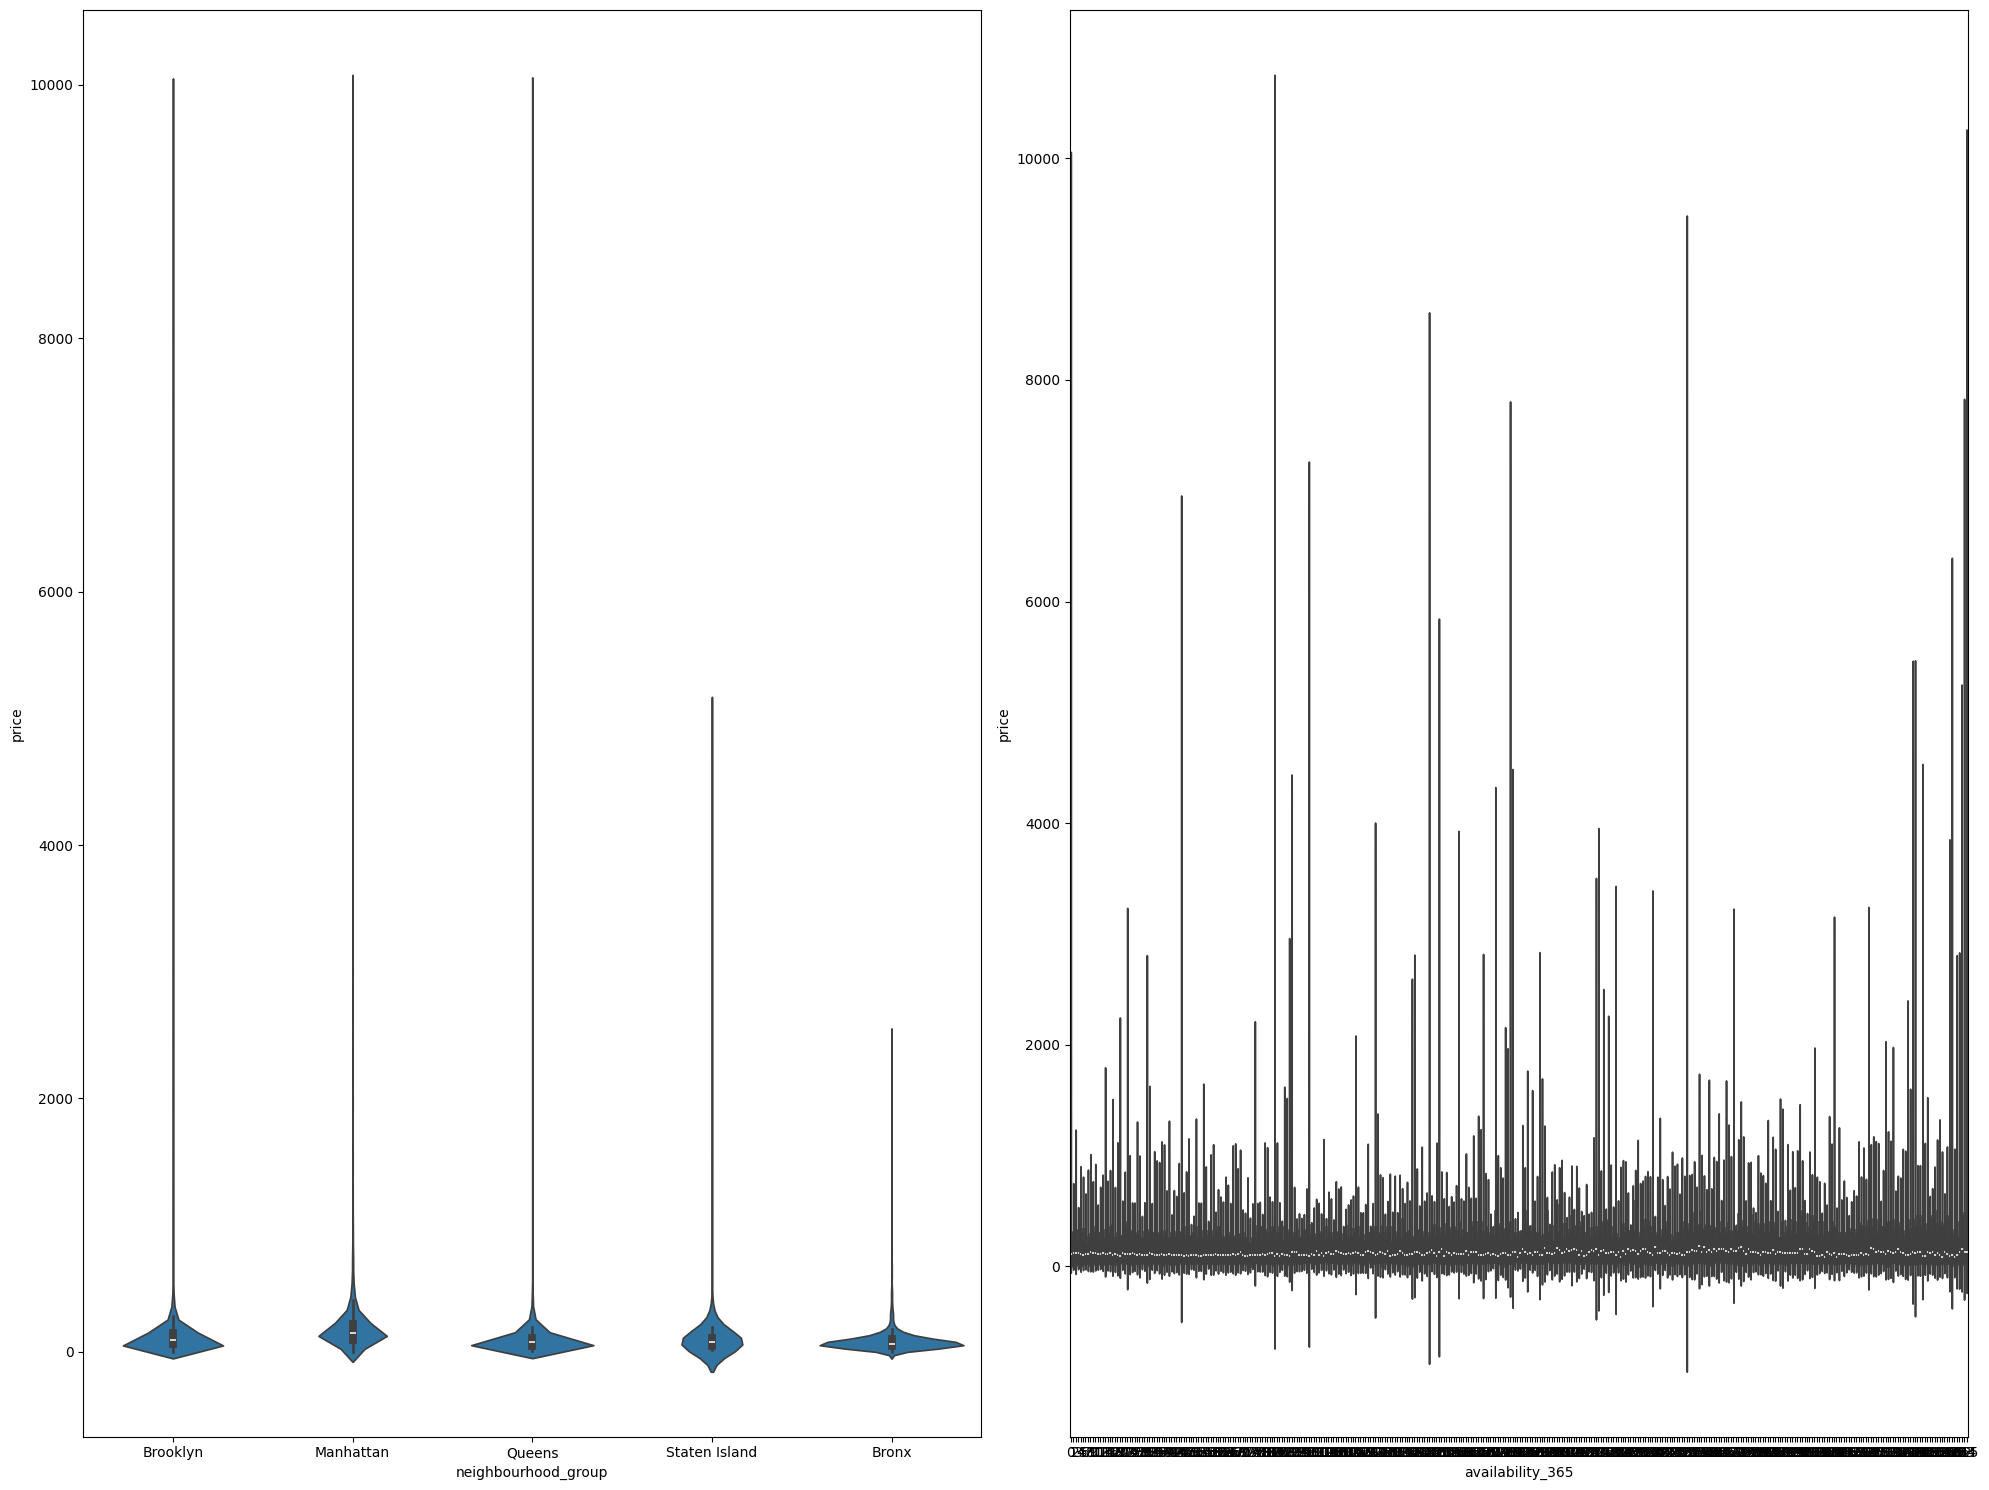

In [15]:
fig, axis = plt.subplots(1, 2, figsize=(20, 15))

sns.violinplot(ax=axis[0], data=df, x='neighbourhood_group', y='price')
sns.violinplot(ax=axis[1], data=df, x='availability_365', y='price')

plt.tight_layout()
plt.show()

Explicación: La forma del "violin" muestra la distribución de la variable. La anchura del violin en cualquier punto indica la densidad de los datos en esa región. Si el violin es más ancho en una parte específica, significa que hay más datos en esa región. Por el contrario, si el violin es más estrecho, significa que hay menos datos.

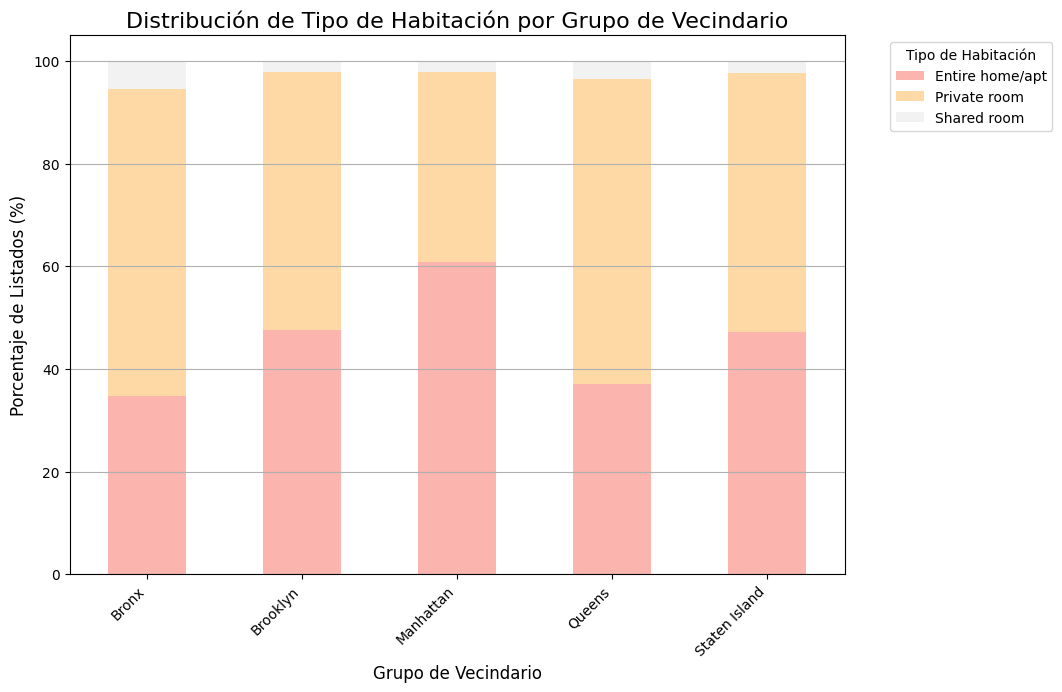

In [ ]:
proportional_table = pd.crosstab(df['neighbourhood_group'], df['room_type'], normalize='index') * 100

plt.figure(figsize=(10, 7))

proportional_table.plot(kind='bar',
                        stacked=True,
                        figsize=(10, 7),
                        cmap='Pastel1',
                        ax=plt.gca())

plt.title('Distribución de Tipo de Habitación por Grupo de Vecindario', fontsize=16)
plt.xlabel('Grupo de Vecindario', fontsize=12)
plt.ylabel('Porcentaje de Listados (%)', fontsize=12)
plt.legend(title='Tipo de Habitación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y')
plt.show()

Observaciones: El gráfico muestra cómo se reparten los tipos de habitaciones en cada distrito de la ciudad.

Manhattan se enfoca en Habitaciones Compartidas: Este distrito tiene la mayor proporción de habitaciones compartidas (la barra roja es la más grande), representando alrededor del 60% de sus listados.

Bronx y Queens se enfocan en Habitaciones Privadas: En contraste, Bronx y Queens se centran más en las habitaciones privadas (la barra amarilla es la más grande), que representan aproximadamente el 60-65% de sus listados.

Brooklyn y Staten Island están más equilibrados: Estos distritos tienen una distribución casi 50/50 entre ambos tipos de habitaciones
Manhattan es la excepción, dominando con listados de habitaciones compartidas. Bronx y Queens favorecen las habitaciones privadas.

>Combinaciones del target con varias predictoras -->

El análisis multivariante también permite combinar el target con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.

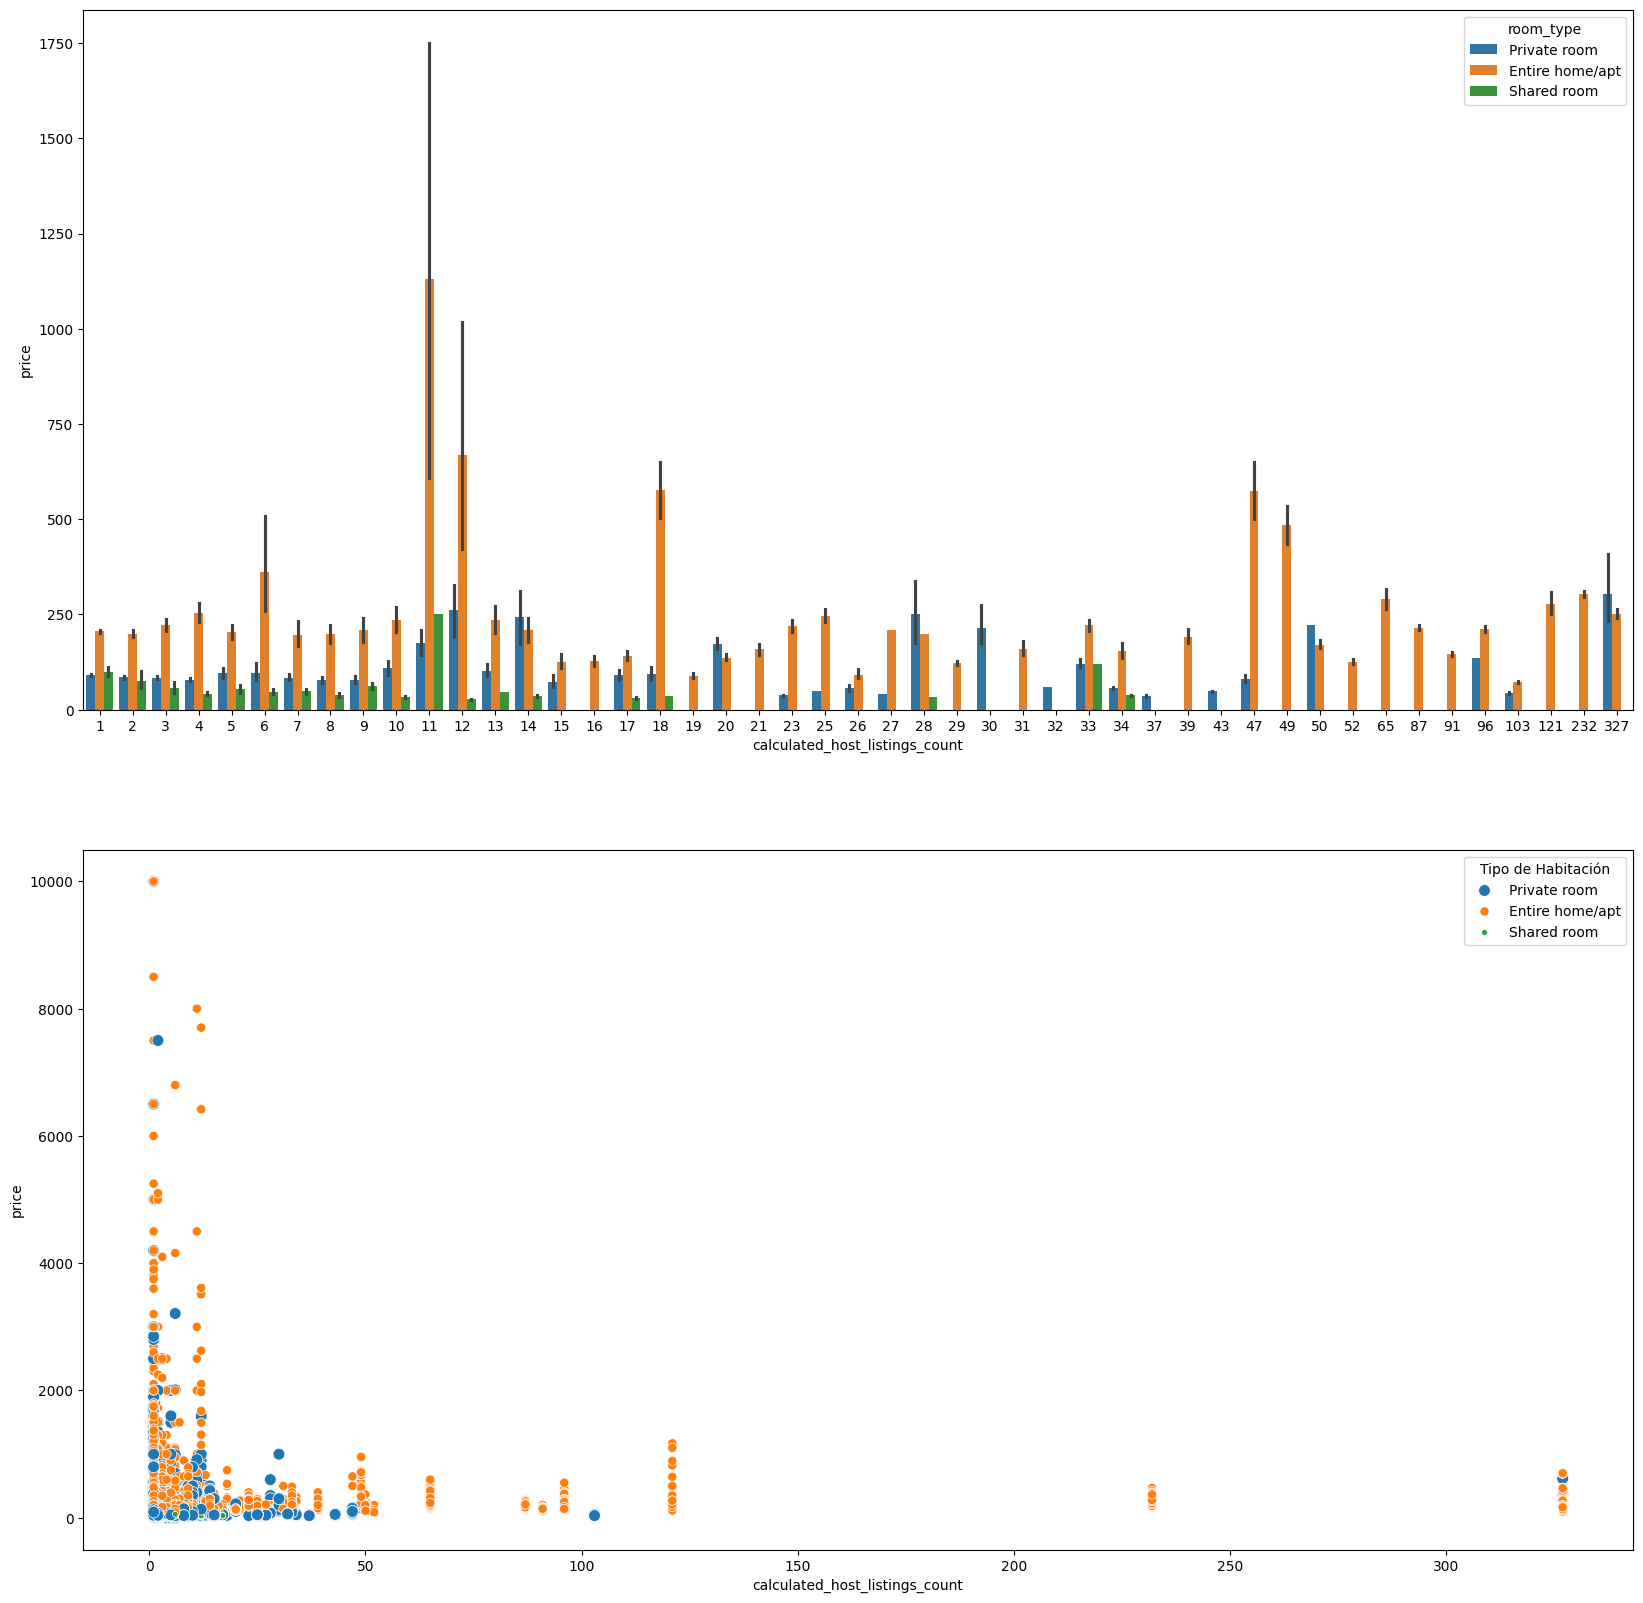

In [17]:
fig, axis = plt.subplots(2, figsize=(20, 20))

sns.barplot(ax=axis[0], data=df, 
            x="calculated_host_listings_count", 
            y="price", hue="room_type",)
sns.scatterplot(ax=axis[1], data=df,
                x='calculated_host_listings_count',
                y='price', hue='room_type',
                size='room_type')

plt.legend(title='Tipo de Habitación')
plt.show()

Observaciones: la mayoría de los alquileres se concentran en Manhattan y Brooklyn. En cuanto al tipo de alojamiento, la oferta está dominada por apartamentos completos y habitaciones privadas, mientras que las habitaciones compartidas son una opción muy minoritaria. La variable que más influencia tiene en el precio es el tipo de habitación: los precios más altos pertenecen casi siempre a los apartamentos completos (puntos naranjas) y los listados de habitaciones privadas (puntos azules) se mantienen en un rango de precio mucho más bajo y estable. Las habitaciones compartidas (puntos verdes) son consistentemente las más baratas.

Al observar los precios segmentados por vecindario, se nota que, aunque los apartamentos completos son caros en general, el lugar específico importa muchísimo. Hay un vecindario atípico (identificado con el número 12 en el gráfico) donde el precio promedio de los apartamentos completos es excepcionalmente alto, superando con creces a todos los demás distritos. En el resto de los vecindarios, los precios de las habitaciones privadas se mantienen en un nivel bajo y similar, demostrando que este tipo de alquiler es menos sensible a la ubicación que el alquiler de una propiedad entera.

### Análisis de correlaciones

El análisis multivariante también permite combinar el target con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.

#### Análisis numérico-categórico (completo)

Este es el análisis a mayor detalle que podemos llevar a cabo. Para ello, simplemente hemos de calcular las correlaciones entre las variables, ya que es el mayor indicativo sobre las relaciones.

Así, una vez comprobemos que existe alguna relación, podremos profundizar en el estudio.

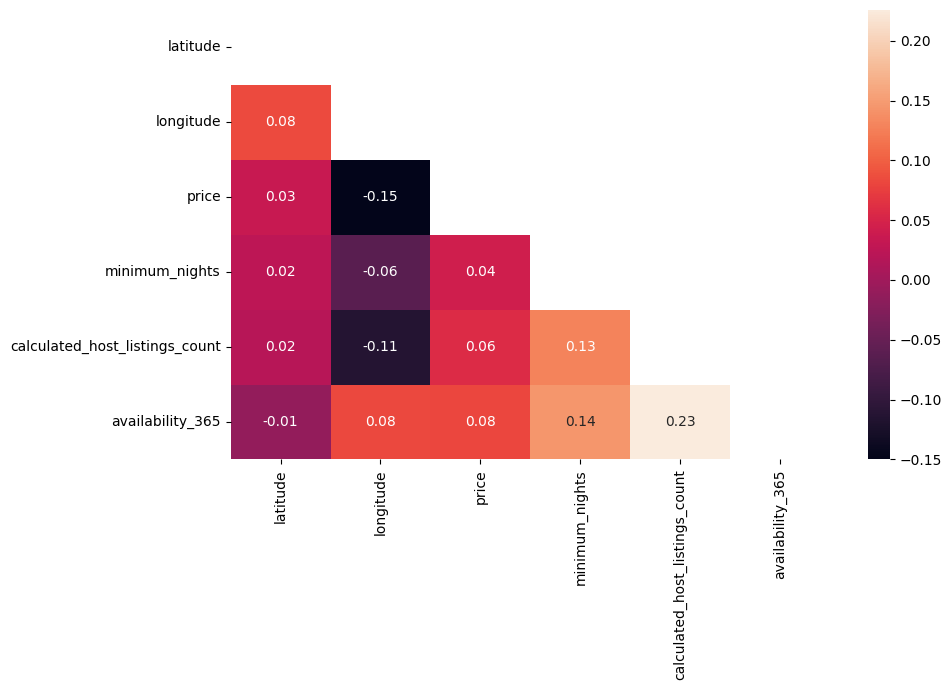

In [18]:
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

Este mapa de colores nos muestra qué tan conectada está cada variable numérica con el Precio y con las demás:

El Precio no tiene amigos fuertes: La conclusión más importante es que el precio no tiene una conexión lineal fuerte con ninguna de estas variables. Los números son muy bajos (cercanos a cero), lo que significa que no se puede predecir el precio solo mirando la latitud, la longitud, la disponibilidad o la experiencia del anfitrión.
La Longitud (moverse al este o al oeste) es la que tiene la conexión menos débil (0.15), sugiriendo que los precios bajan un poquito si te alejas del centro (hacia el este).
La experiencia se relaciona con la disponibilidad: La conexión más fuerte que encontramos es entre cuántos anuncios tiene un anfitrión (Experiencia) y la Disponibilidad de sus listados (0.23). Esto significa que los anfitriones con muchos listados suelen tenerlos disponibles durante más días del año.

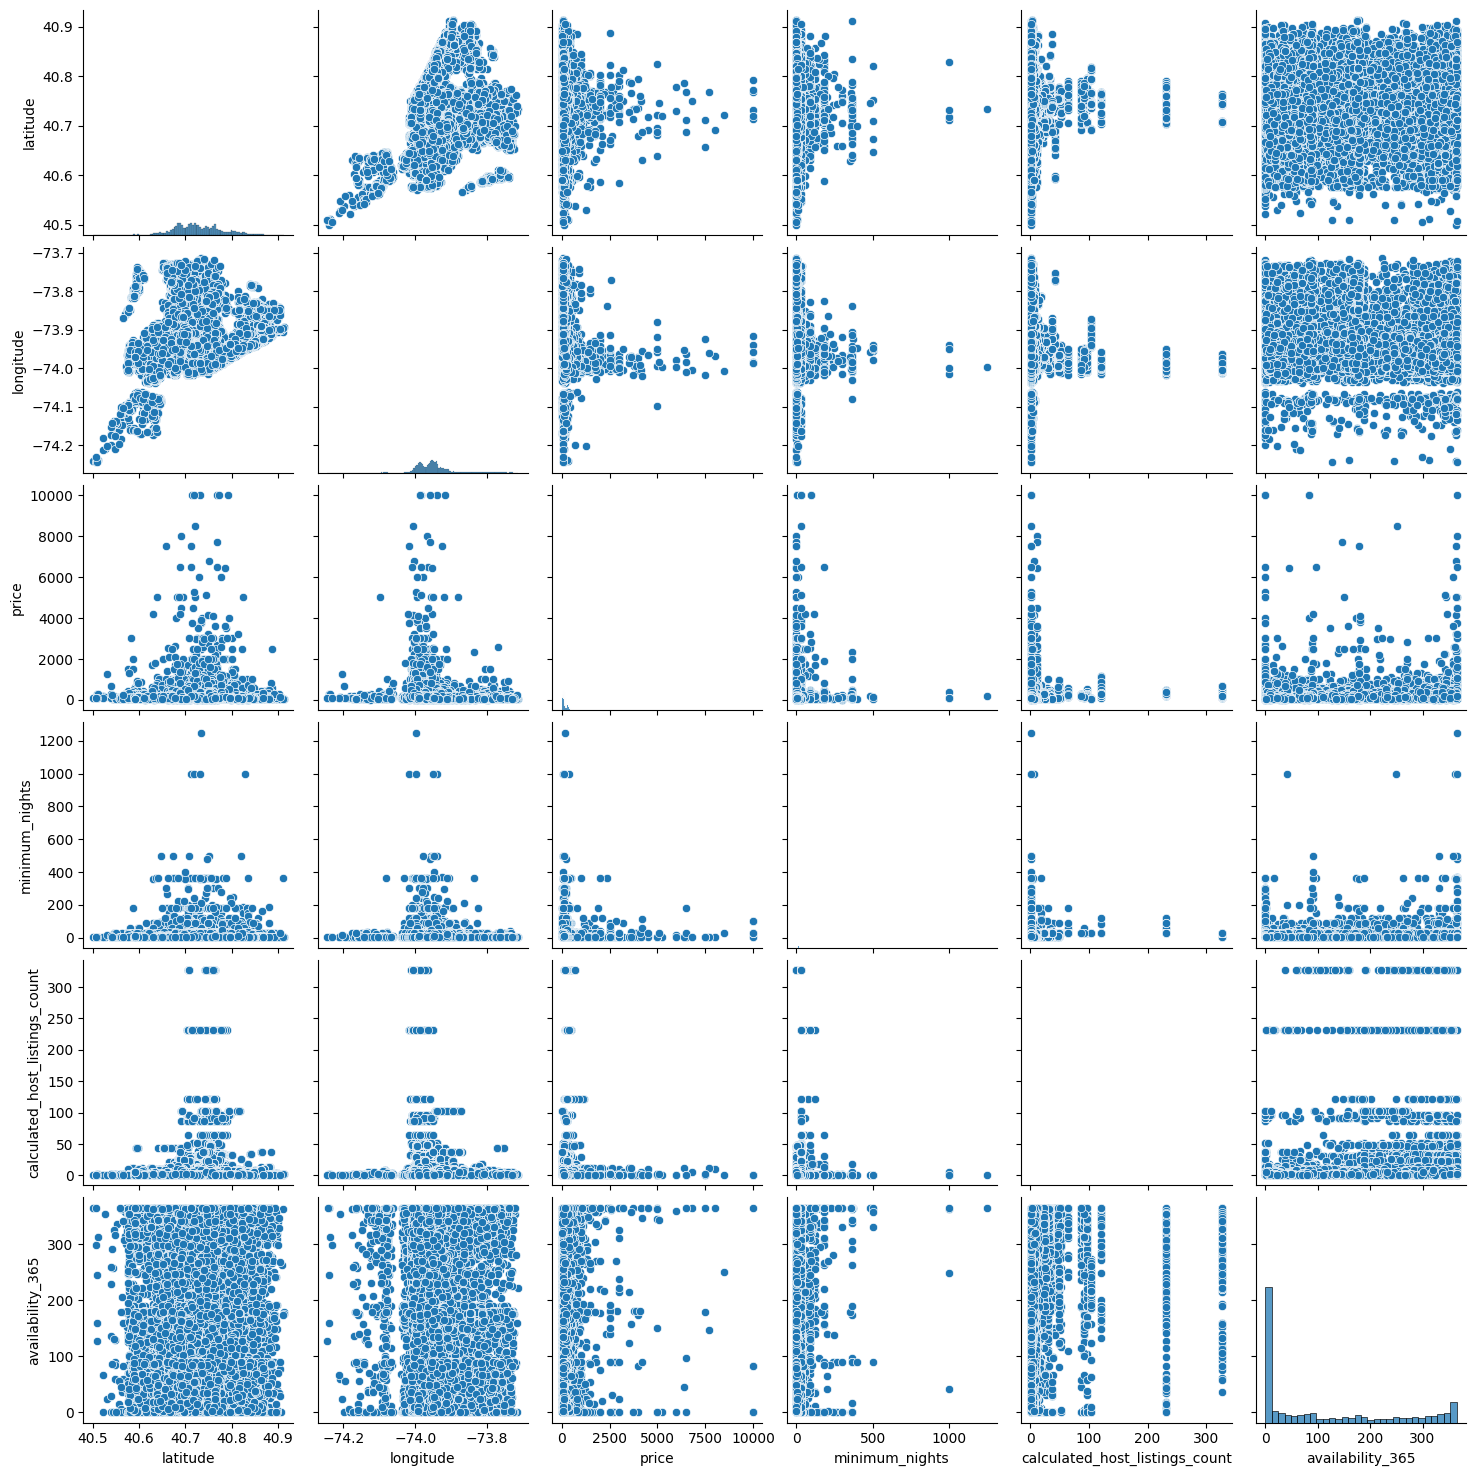

In [20]:
sns.pairplot(data=df)

### Paso 6: Ingeniería de características

La ingeniería de características (feature engineering) es un proceso que implica la creación de nuevas características (o variables) a partir de las existentes para mejorar el rendimiento del modelo. Esto puede implicar una variedad de técnicas como la normalización, la transformación de los datos, etcétera. El objetivo es mejorar la precisión del modelo y/o reducir la complejidad del mismo, facilitando así su interpretación.

En los pasos previos hemos empezado a trabajar con los datos eliminando duplicados, contabilizando los valores nulos e, incluso, para calcular correlaciones, transformando Sexy Embarked en categorías numéricas. Si bien esto podríamos haberlo realizado en este paso, pues forma parte de la ingeniería de características, normalmente suele hacerse antes de analizar las variables, separando este proceso en uno previo y este que vamos a ver a continuación.

#### Análisis de outliers


**Intro to outliers**

- Un **valor atípico** (*outlier*) es un punto de datos que se desvía significativamente de los demás.
- Es un valor que es notablemente diferente de lo que sería de esperar dada la tendencia general de los datos.

Los outliers pueden ser causados por:

- errores en la recolección de datos,
- variaciones naturales en los daos, o
- pueden ser indicativos de algo significativo, como una anomalía o evento extraordinario.

Para lidiar con ellos hay muchas técnicas que se resume en los siguientes puntos:

- Eliminarlos. Aquellas instancias que cuenten con características atípicas se eliminan del conjunto de datos. Sin embargo, si hay muchos valores atípicos, esta estrategia puede causar que se pierda gran parte de la información disponible.
- Mantenerlos. Podría ser una política que en ciertos casos tuviera sentido. Normalmente no se utiliza.
- Reemplazarlos. Si no queremos eliminar instancias completas por la presencia de outliers en una de sus características, podemos reemplazarlos tomándolos en cuenta como valores faltantes y reutilizando la política.



**Outliers: Análisis descriptivo**

Es una poderosa herramienta para caracterizar el conjunto de datos: la media, desviación y los cuartiles nos brindan una poderosa información sobre cada variable. La función `.describe()` de un DataFrame nos ayuda a calcular en unos tiempos muy reducidos todos estos valores.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


#### Outliers: Visualización

Dibujar los diagramas de cajas de las variables también nos da una información muy poderosa sobre los valores atípicos que se salen de las regiones de confianza:

<Axes: xlabel='longitude'>

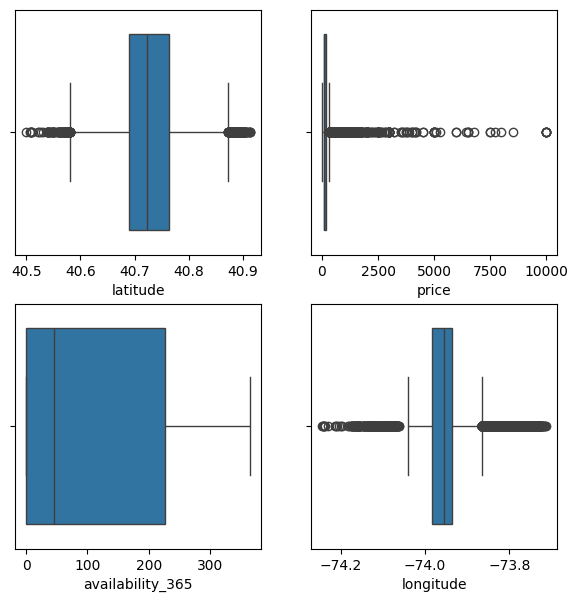

In [22]:
fig, axis = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(ax=axis[0, 0], data=df, x="latitude")
sns.boxplot(ax=axis[0, 1], data=df, x="price")
sns.boxplot(ax=axis[1, 0], data=df, x="availability_365")
sns.boxplot(ax=axis[1, 1], data=df, x="longitude")


Los gráficos de caja muestran dónde se concentra la mayoría de los datos y dónde están los precios o valores extremadamente raros (outliers):

El Precio es el más problemático (Arriba a la derecha): La mayoría de los precios están muy juntos en el lado izquierdo (son baratos). Pero hay una larguísima cola de puntos raros que se van hasta 10,000. Es decir, hay muchísimos listados que son increíblemente caros y que distorsionan todo.
La Disponibilidad (Abajo a la izquierda): La mayoría de los alquileres no están disponibles muchos días del año (caja pegada al cero). Pero hay muchos puntos que son "raros" porque están disponibles casi todo el año (círculos a la derecha).
La Ubicación (Latitud y Longitud): La ubicación es la que parece más "normal". La mayoría de los listados están en un área central (la caja), pero hay algunos puntos extraños en los extremos que representan listados en los bordes de la ciudad.

Para poder analizar el precio de manera justa, necesitamos limpiar esos listados increíblemente caros, ya que la mayoría de los listados se comportan de manera muy diferente.

In [47]:
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [48]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 334.0, límite inferior: 0, rango intercuartílico: 106.0'

La mayoría de los listados son económicos: el precio más común es de 106. Sin embargo, hay algunos listados extremadamente caros (llegando a 10,000) que hacen que el precio promedio se vea más alto de lo que realmente es.

Límite de Precio Normal: El análisis dice que cualquier precio por encima de 334 es tan raro que debe considerarse un "punto atípico" o outlier.

Las variables numéricas como la ubicación (latitud/longitud), la experiencia del anfitrión (cuántos anuncios tiene) y la disponibilidad del listado no tienen una conexión lineal fuerte con el precio. Es decir, saber cuántos anuncios tiene un anfitrión no ayuda a predecir cuánto va a cobrar.

#### Análisis de valores faltantes


Un valor faltante (missing value) es un espacio que no tiene valor asignado en la observación de una variable específica.

Este tipo de valores son bastante comunes y pueden surgir por muchas razones:

Por ejemplo, podría haber un error en la recopilación de datos,
alguien podría haberse negado a responder una pregunta en una encuesta,
o simplemente podría ser que cierta información no esté disponible o no sea aplicable.
Para lidiar con ellos hay muchas técnicas, y puedes encontrar más información aquí, pero que se resume en los siguientes puntos:

Eliminarlos. Similar al caso anterior de los outliers.
Imputación numérica: Para rellenar los valores faltantes en una variable numérica.
Reemplazar por valores estadísticos: media, moda o mediana de esa característica.
Imputar por los vecinos más cercanos.
Imputación categórica: Cuando la columna es categórica, normalmente se suelen rellenar cogiendo el elemento de la mayor o mejor categoría.
La función isnull() es una poderosa herramienta para obtener esta información:

In [25]:
df.shape[1]

9

In [26]:
df.isnull().sum() / df.shape[0]

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [27]:
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [28]:
df.isnull().sum().sort_values(ascending=False) / len(df)

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [29]:
df["price"].median()

np.float64(106.0)

In [30]:
df["price"][df['calculated_host_listings_count'] == 3].max()

np.int64(4100)

##### Verificación

Verificamos que los valores hayan sido imputados correctamente y, por lo tanto, ya no existen faltantes.

In [31]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [32]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,6,2


### Paso 7: Split (dos métodos o enfoques)

##### Primer Enfoque: Realizar cambios antes de hacer el split de datos
En este enfoque:

Primero se escala/codifica todo el dataset
Luego se divide en conjuntos de entrenamiento y prueba.
Ventaja:

Garantiza que los datos de entrenamiento y prueba están procesados de la misma manera, ya que se utilizan los mismos parámetros de escalado y/o sistema de codificación en todo el dataset.

Desventaja:

Introduce información del conjunto de prueba en el conjunto de entrenamiento (porque los parámetros de se calculan usando todo el dataset). Esto puede llevar a una sobreestimación del rendimiento del modelo, ya que el modelo ha "visto" indirectamente la distribución de los datos de test.

##### Segundo Enfoque: Realizar cambios después de hacer el split de datos.
En este enfoque:

Primero se divide el dataset en conjuntos de entrenamiento y prueba
Luego se procesa cada conjunto por separado (escalando/codificando) usando los parámetros que se calcularon sobre el conjunto de entrenamiento.
Ventaja:

Refleja mejor el escenario del mundo real donde el modelo no tiene acceso a los datos de prueba durante el entrenamiento. Esto asegura una evaluación justa del modelo en el conjunto de prueba.

Desventaja:

Puede haber ligeras diferencias en el procesamiento entre los conjuntos de entrenamiento y prueba, ya que los parámetros se basan solo en el conjunto de entrenamiento. Sin embargo, esto generalmente no es un problema si el conjunto de datos es lo suficientemente grande y representativo.

#### Realizamos el split

In [33]:
df.shape

(48895, 9)

In [34]:
X = df.drop("price", axis=1)
y = df["price"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [35]:
X_train

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
18165,Manhattan,Financial District,40.70741,-74.00540,Entire home/apt,1,1,0
3883,Brooklyn,Bensonhurst,40.61518,-73.98874,Entire home/apt,30,1,282
4803,Brooklyn,Bushwick,40.69502,-73.90645,Private room,3,1,15
14900,Manhattan,Gramercy,40.73755,-73.98041,Entire home/apt,5,1,0
15597,Manhattan,Harlem,40.80276,-73.94976,Entire home/apt,28,2,310
...,...,...,...,...,...,...,...,...
5294,Manhattan,Harlem,40.82654,-73.94620,Entire home/apt,1,1,297
1726,Manhattan,West Village,40.73364,-74.00539,Entire home/apt,2,1,63
35653,Bronx,Westchester Square,40.84184,-73.84967,Private room,1,2,123
25720,Manhattan,East Village,40.72547,-73.98315,Entire home/apt,2,1,0


In [36]:
X_train.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [37]:
y_test.shape

(9779,)

In [38]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
18165,Manhattan,Financial District,40.70741,-74.00540,Entire home/apt,1,1,0
3883,Brooklyn,Bensonhurst,40.61518,-73.98874,Entire home/apt,30,1,282
4803,Brooklyn,Bushwick,40.69502,-73.90645,Private room,3,1,15
14900,Manhattan,Gramercy,40.73755,-73.98041,Entire home/apt,5,1,0
15597,Manhattan,Harlem,40.80276,-73.94976,Entire home/apt,28,2,310


In [39]:
y_train

18165     238
3883       76
4803       55
14900     130
15597     376
         ... 
5294      125
1726      189
35653      28
25720     150
28947    4160
Name: price, Length: 39116, dtype: int64

### Paso 8: Scaling & Encoding

##### Scaling - Escalado de valores

Feature Scaling

El escalado de valores (feature scaling) es un paso crucial en el preprocesamiento de datos para muchos algoritmos de Machine Learning. Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí.

Algunas técnicas son:

Normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estándar de 1.
Mínimo-Máximo, que transforma los datos para que todos los valores estén entre 0 y 1.
A continuación detallaremos cómo podemos aplicar cada una de ellas, pero recordemos que depende mucho del modelo que vayamos a querer entrenar

Normalización

In [40]:
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
norm_features = norm_scaler.fit_transform(df[num_variables])

df_norm = pd.DataFrame(norm_features,
                       index=df.index,
                       columns=num_variables)
df_norm.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.034716,1.916250
1,0.452436,-0.684639,0.300974,-0.293996,-0.156104,1.840275
2,1.468399,0.222497,-0.011329,-0.196484,-0.186451,1.916250
3,-0.803398,-0.164450,-0.265335,-0.293996,-0.186451,0.617065
4,1.275660,0.177216,-0.302811,0.144807,-0.186451,-0.856865


In [41]:
df_norm

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.034716,1.916250
1,0.452436,-0.684639,0.300974,-0.293996,-0.156104,1.840275
2,1.468399,0.222497,-0.011329,-0.196484,-0.186451,1.916250
3,-0.803398,-0.164450,-0.265335,-0.293996,-0.186451,0.617065
4,1.275660,0.177216,-0.302811,0.144807,-0.186451,-0.856865
...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.344452,-0.245240,-0.156104,-0.788486
48891,-0.497141,0.411637,-0.469373,-0.147729,-0.156104,-0.583352
48892,1.573480,0.075821,-0.157070,0.144807,-0.186451,-0.651730
48893,0.523774,-0.843881,-0.406912,-0.293996,-0.034716,-0.841669


##### Escalado Mínimo-Máximo

In [42]:
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
min_max_features = min_max_scaler.fit_transform(df[num_variables])

df_min_max = pd.DataFrame(min_max_features,
                          index=df.index,
                          columns=num_variables)
df_min_max

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
0,0.357393,0.511921,0.0149,0.000000,0.015337,1.000000
1,0.614199,0.490469,0.0225,0.000000,0.003067,0.972603
2,0.748252,0.569257,0.0150,0.001601,0.000000,1.000000
3,0.448496,0.535649,0.0089,0.000000,0.000000,0.531507
4,0.722820,0.565324,0.0080,0.007206,0.000000,0.000000
...,...,...,...,...,...,...
48890,0.432502,0.554109,0.0070,0.000801,0.003067,0.024658
48891,0.488906,0.585684,0.0040,0.002402,0.003067,0.098630
48892,0.762117,0.556517,0.0115,0.007206,0.000000,0.073973
48893,0.623612,0.476639,0.0055,0.000000,0.015337,0.005479


In [43]:
df_min_max.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

##### Encoding - Codificación de variables categóricas

Feature Encoding for categorical variables

Las variables categóricas, que contienen valores discretos y no numéricos, deben transformarse en una forma que los algoritmos de Machine Learning puedan entender.

Existen varias técnicas de codificación, cada una con sus ventajas y desventajas, dependiendo del tipo de datos y del modelo utilizado.

##### Label Encoding

Asigna un valor entero único a cada categoría.

Adecuado para variables categóricas ordinales donde el orden tiene importancia.

In [44]:

X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()


label_encoder_neighbourhood = LabelEncoder()

label_encoder_neighbourhood.fit(X_train_cat_le['neighbourhood_group'])

X_train_cat_le['neighbourhood_le'] = label_encoder_neighbourhood.transform(X_train_cat_le['neighbourhood_group'])
X_test_cat_le['neighbourhood_le'] = label_encoder_neighbourhood.transform(X_test_cat_le['neighbourhood_group'])

label_encoder_roomtype = LabelEncoder()

label_encoder_roomtype.fit(X_train_cat_le['room_type'])

X_train_cat_le['room_type_le'] = label_encoder_roomtype.transform(X_train_cat_le['room_type']) 
X_test_cat_le['room_type_le'] = label_encoder_roomtype.transform(X_test_cat_le['room_type'])   

X_train_cat_le[['neighbourhood_group', 'neighbourhood_le', 'room_type', 'room_type_le']].head()


,neighbourhood_group,neighbourhood_le,room_type,room_type_le
18165,Manhattan,2,Entire home/apt,0
3883,Brooklyn,1,Entire home/apt,0
4803,Brooklyn,1,Private room,1
14900,Manhattan,2,Entire home/apt,0
15597,Manhattan,2,Entire home/apt,0


#### One-Hot Encoding

Asigna un valor entero único a cada categoría.

Crea una columna binaria (0 o 1) para cada categoría.

Adecuado para variables categóricas nominales donde no hay un orden implícito.

No es conveniente cuando hay muchas categorías

In [45]:
cat_variables = ["neighbourhood_group", "room_type"]

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot_encoder.fit(X_train[cat_variables])

X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,
                               index=X_train.index,
                               columns=onehot_encoder.get_feature_names_out(cat_variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,
                              index=X_test.index,
                              columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
18165,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3883,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4803,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14900,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15597,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
